# Clasificación supervisada

Dependiendo de las necesidades del problema, el ámbito en el que se va a desenvolver y los factores que afectan a la toma de decisiones, existen diferentes algoritmos de clasificación automática con diferentes características, como la posibilidad de algún tipo de retroalimentación durante la ejecución, y si esta es de origen humano o automática.

Los dos grandes destacados son los algoritmos de clasificación supervisada y los algoritmos de clasificación no supervisada. Si la información se obtiene de una fuente externa acerca del éxito o fracaso de sus resultados, se hablará de un algoritmo de clasificación supervisado. En este tipo de algoritmos se genera una función que establece una correspondencia entre las entradas y salidas deseadas del sistema, donde la base del conocimiento del sistema está formada por ejemplos etiquetados a priori. 

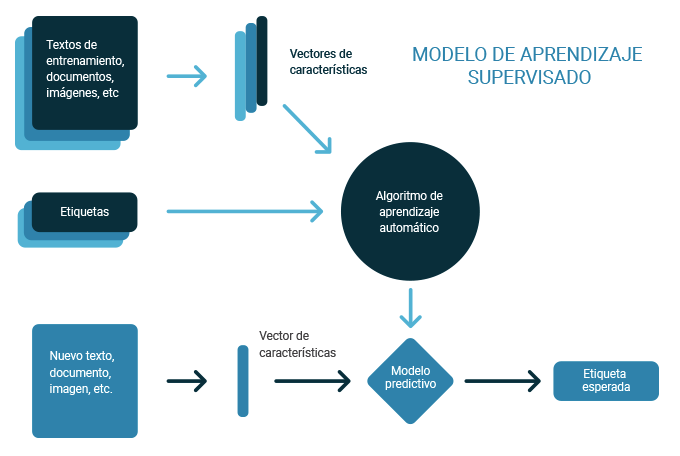

Por ejemplo, los correos electrónicos se etiquetan como “spam” o “legítimo” por parte de los usuarios. El entrenamiento del algoritmo de aprendizaje comienza analizando qué características o patrones tienen los correos ya marcados con ambas etiquetas. Se puede determinar que un correo spam tiene asignado determinadas direcciones IP, contiene ciertas palabras, etc. Una vez se determinan los patrones por parte del algoritmo, nuevos correos, que no han sido previamente clasificados, se comparan con los patrones y se clasifican en función de sus características. En definitiva, se trata de buscar patrones en datos históricos relacionandos.


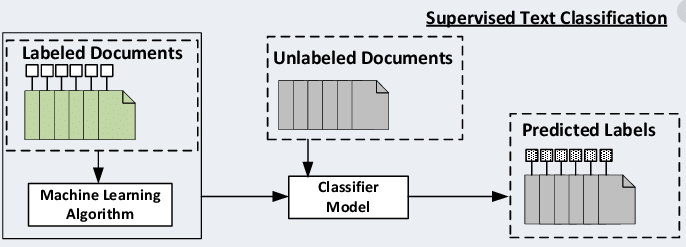

# Ejemplo de aplicación de un algoritmo de clasificación supervisado usando un dataset para el análisis de sentimientos



In [ ]:
import pandas as pd

trainingData = pd.read_csv('semeval-2017-train.csv', delimiter='	')
trainingData = trainingData.head(1000) #Eliminar la funcion head() si se quiere usar todo el dataset. Para las pruebas usamos únicamente los 1000 primeros tweets
trainingData

,label,text
0,1,One Night like In Vegas I make dat Nigga Famous
1,1,Walking through Chelsea at this time of day is...
2,0,"And on the very first play of the night, Aaron..."
3,0,"Drove the bike today, about 40 miles. Felt lik..."
4,-1,looking at the temp outside....hpw did it get ...
...,...,...
995,0,Since Tottenham's game against Everton was pos...
996,0,Former Cruz Azul player in the legendary 70s t...
997,0,You work? RT @SavageBeaute: Going to walk the ...
998,1,@ToyceMonique I know! Im still in Alabama but ...


In [ ]:
trainingData['label'].value_counts()

 1    430
 0    424
-1    146
Name: label, dtype: int64

### Preprocesamiento de los datos de entrenamiento

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

preprocessedText = []

for row in trainingData.itertuples():
    
    
    text = word_tokenize(row[2]) ## indice de la columna que contiene el texto
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [ps.stem(w) for w in text if not w in stops and w.isalnum()]
    text = " ".join(text)
    
    preprocessedText.append(text)

preprocessedData = trainingData
preprocessedData['processed_text'] = preprocessedText

preprocessedData

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,text,processed_text
0,1,One Night like In Vegas I make dat Nigga Famous,one night like In vega I make dat nigga famou
1,1,Walking through Chelsea at this time of day is...,walk chelsea time day rather love love london ...
2,0,"And on the very first play of the night, Aaron...",and first play night aaron rodger int udfa CB ...
3,0,"Drove the bike today, about 40 miles. Felt lik...",drove bike today 40 mile felt like jim carrey ...
4,-1,looking at the temp outside....hpw did it get ...,look temp outsid get hotter sun goe feel like ...
...,...,...,...
995,0,Since Tottenham's game against Everton was pos...,sinc tottenham game everton postpon start seas...
996,0,Former Cruz Azul player in the legendary 70s t...,former cruz azul player legendari 70 team mexi...
997,0,You work? RT @SavageBeaute: Going to walk the ...,you work RT savagebeaut go walk brooklyn bridg...
998,1,@ToyceMonique I know! Im still in Alabama but ...,toycemoniqu I know Im still alabama ill back s...


### Creación de la bolsa de palabras

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

bagOfWordsModel = TfidfVectorizer()
bagOfWordsModel.fit(preprocessedData['processed_text'])
textsBoW= bagOfWordsModel.transform(preprocessedData['processed_text'])
print("Finished")

Finished


In [ ]:
textsBoW.shape

(1000, 3582)

###Entrenamiento de un algoritmo de clasificación (SVM)



In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear') #Modelo de clasificación

X_train = textsBoW #Documentos
Y_train = trainingData['label'] #Etiquetas de los documentos 
svc.fit(X_train, Y_train) #Entrenamiento

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Carga de y preprocesado de documentos de test

In [ ]:
testData = pd.read_csv('semeval-2017-test.csv', delimiter='	')
testData = testData.head(100)
testData

,label,text
0,0,Trump is building a wall on the Mexican border...
1,-1,@lasinferencias & the WALL Trump wants to buil...
2,-1,President Elect? More like President Erect! A ...
3,0,"Ok, I know a lot of you think a wall on the Me..."
4,0,The Great Mexican Wall Deception: Trump's Amer...
...,...,...
95,-1,@RealAlexJones is not going to approve of Mike...
96,0,At least there would be a reason...😒#TrumpTeam...
97,0,"https://t.co/4ma4NhGs3f ZOYA Nail Polish, Sant..."
98,-1,Melania shld partner w/ China to put an end to...


In [ ]:
ps = PorterStemmer()

preprocessedText = []

for row in testData.itertuples():
    
    
    text = word_tokenize(row[2]) ## indice de la columna que contiene el texto
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [ps.stem(w) for w in text if not w in stops and w.isalnum()]
    text = " ".join(text)
    
    preprocessedText.append(text)

preprocessedDataTest = testData
preprocessedDataTest['processed_text'] = preprocessedText

preprocessedDataTest

,label,text,processed_text
0,0,Trump is building a wall on the Mexican border...,trump build wall mexican border stop herrion c...
1,-1,@lasinferencias & the WALL Trump wants to buil...,lasinferencia wall trump want build I research...
2,-1,President Elect? More like President Erect! A ...,presid elect more like presid erect A wall On ...
3,0,"Ok, I know a lot of you think a wall on the Me...",Ok I know lot think wall mexican border insan ...
4,0,The Great Mexican Wall Deception: Trump's Amer...,the great mexican wall decept trump america al...
...,...,...,...
95,-1,@RealAlexJones is not going to approve of Mike...,realalexjon go approv mike penc goblin kiss tr...
96,0,At least there would be a reason...😒#TrumpTeam...,At least would reason trumpteam trumptransitio...
97,0,"https://t.co/4ma4NhGs3f ZOYA Nail Polish, Sant...",http zoya nail polish santa babi lip ti quad n...
98,-1,Melania shld partner w/ China to put an end to...,melania shld partner china put end despic onli...


In [ ]:
testData['label'].value_counts()

 0    48
-1    35
 1    17
Name: label, dtype: int64

Importante!:
Se emplea la misma representación de bolsa de palabras que se ha usado para entrenar (bagOfWordsModel)

In [ ]:
textsBoWTest= bagOfWordsModel.transform(preprocessedDataTest['processed_text'])
print("Finished")

Finished


In [ ]:
textsBoWTest.shape

(100, 3582)

### Clasificación de los documentos de test

In [ ]:
X_test = textsBoWTest #Documentos


predictions = svc.predict(X_test) #Se almacena en el array predictions las predicciones del clasificador

###Evaluación de la predicción

In [ ]:
from sklearn.metrics import classification_report

Y_test = testData['label'] #Etiquetas reales de los documentos

print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          -1       0.50      0.06      0.10        35
           0       0.50      0.77      0.61        48
           1       0.41      0.53      0.46        17

    accuracy                           0.48       100
   macro avg       0.47      0.45      0.39       100
weighted avg       0.48      0.48      0.41       100



### Entrenamiento y Evaluación de otro algoritmo de clasificación: k-NN

El clasificador k-vecinos más próximos, en inglés k-nearest neightbours, se basa en la suposición de que se puede clasificar un elemento en función a los k elementos más cercanos que tenga, siendo k un número entero no predefinido. De esta forma, si k fuese 5, el algoritmo utilizaría los 5 elementos más cercanos para realizar una clasificación, y si fuera 15 utilizaría los 15 más cercanos. Cada uno de estos elementos, además, puede obtener un valor dependiendo de la distancia a la que se encuentre el punto a analizar.

Por ejemplo, una vez representados los datos de 2 clases distintas, roja y azul, se obtiene una gráfica como la de la figura siguiente, donde el punto negro representa el nuevo atributo a ser clasificado. Con k=1 el nuevo punto se clasifica como un punto azul, ya que el siguiente elemento más cercano es azul. Si cambiamos a k=5, el rango se amplía y pasa a tener 3 elementos rojos contra 2 azules, por lo que el nuevo elemento pasa a clasificarse como rojo, pues es el color predominante.

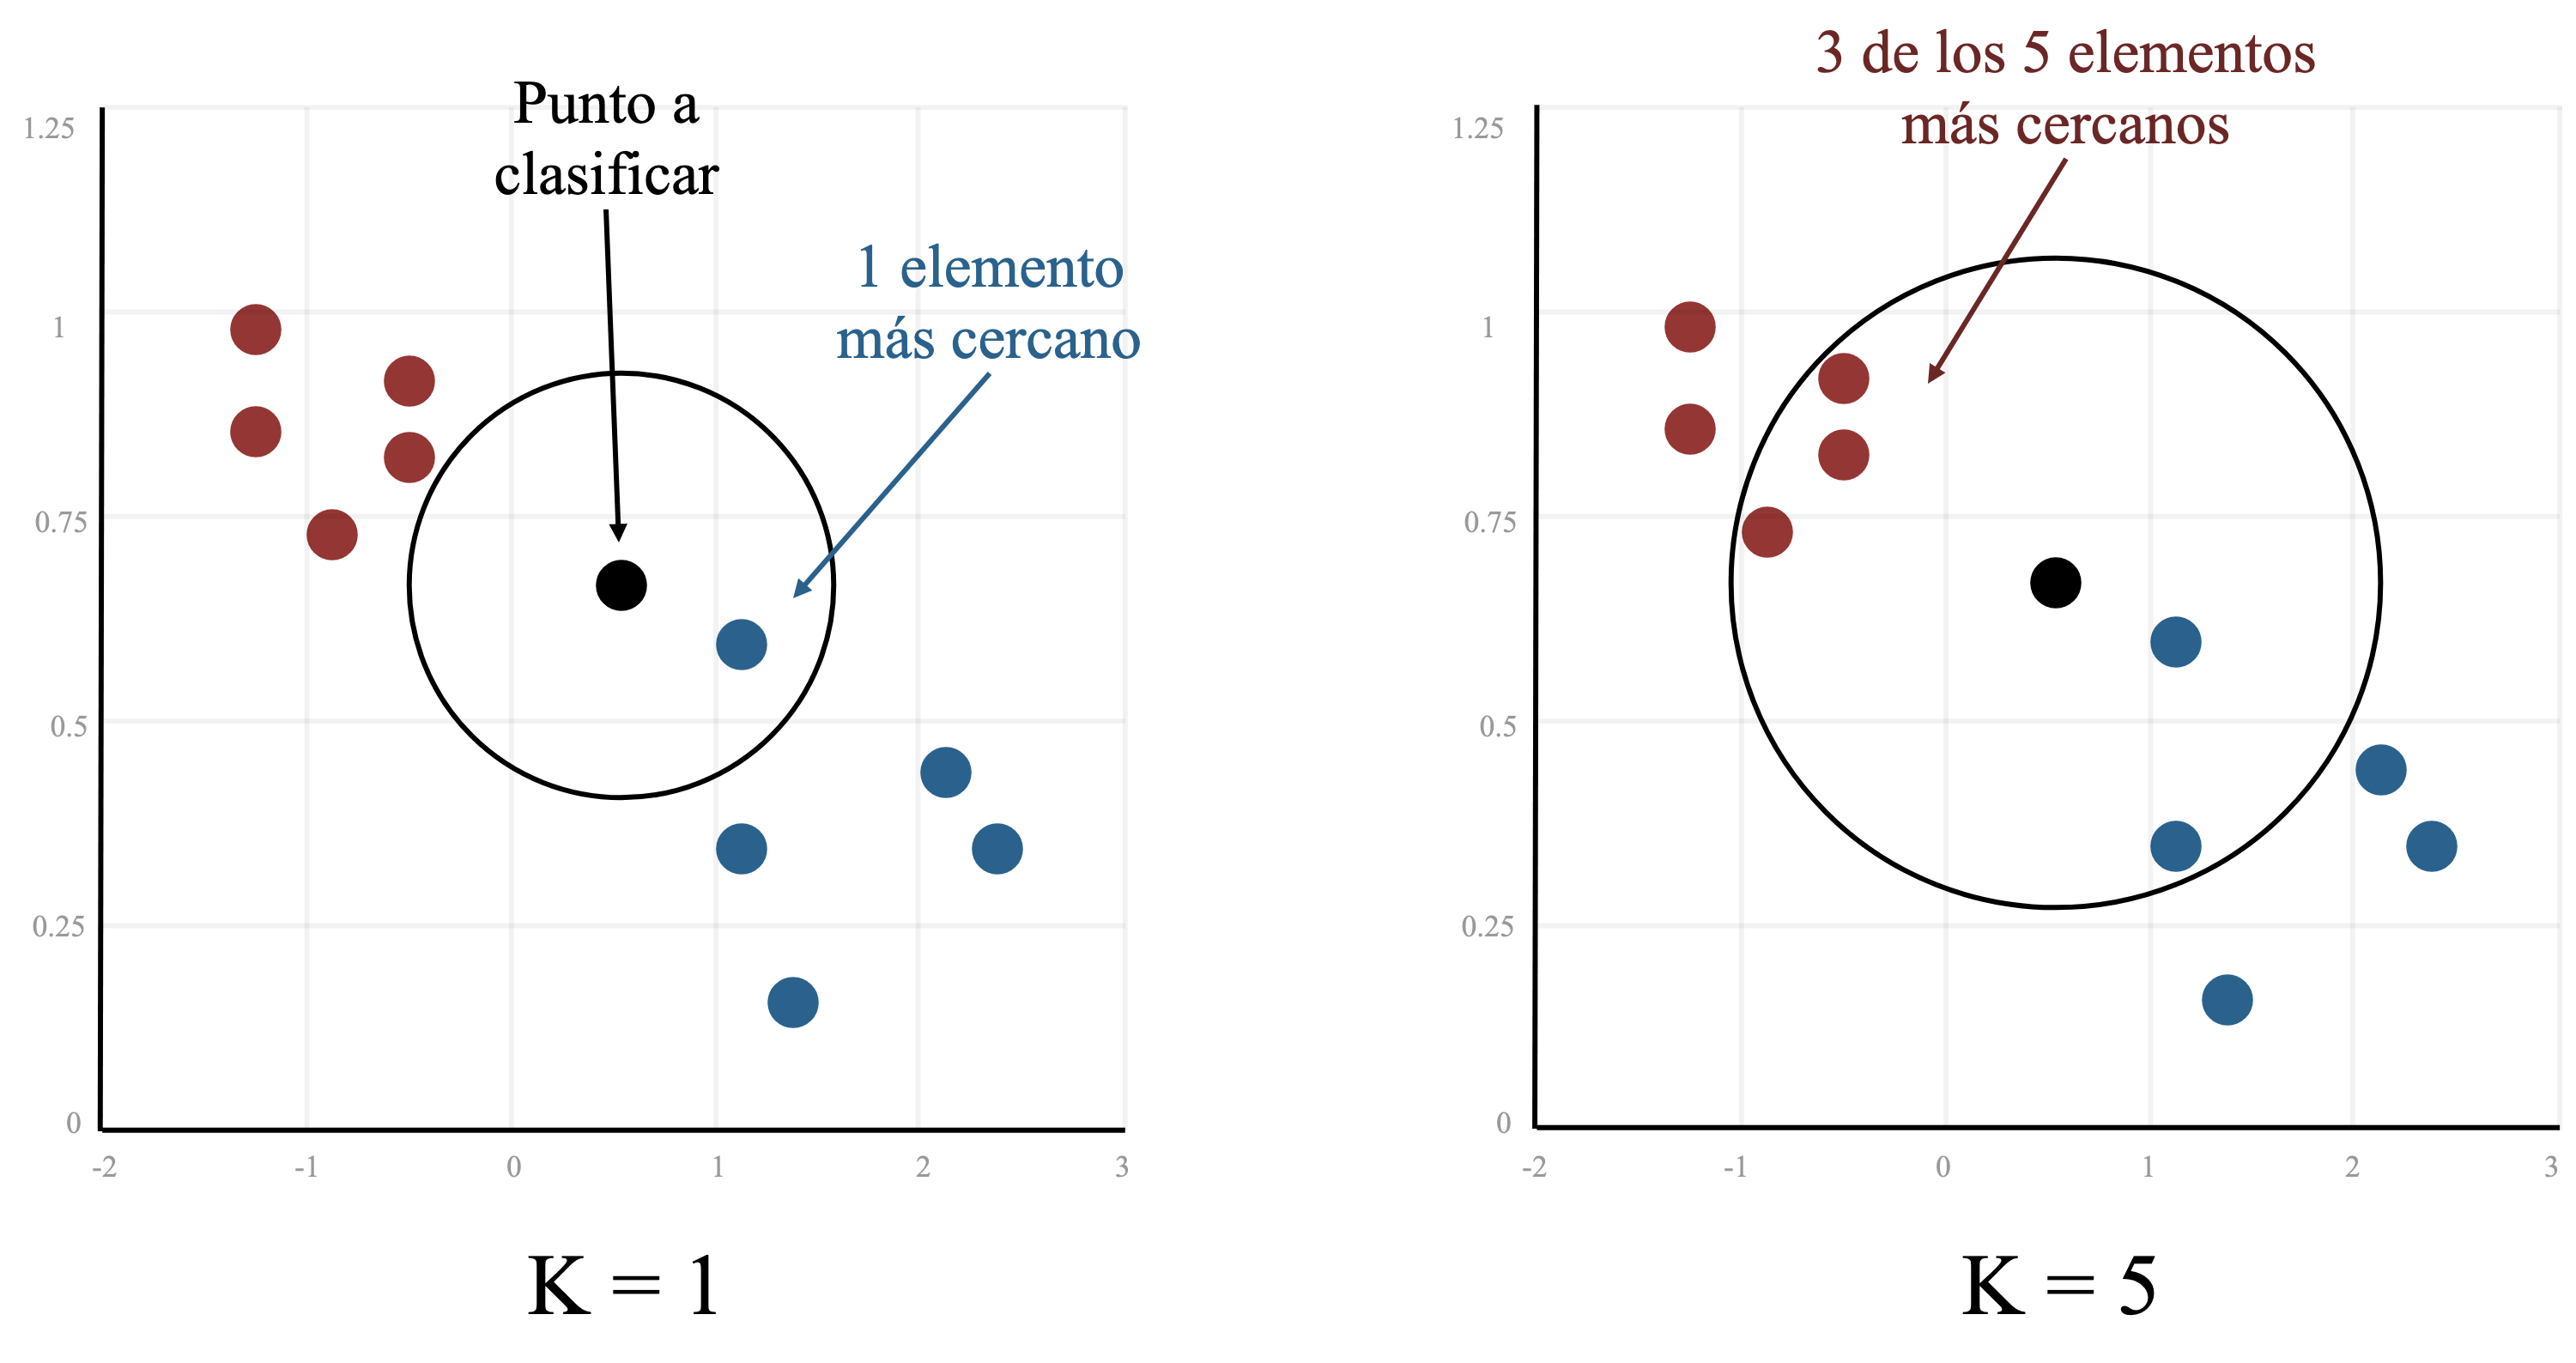

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)


neigh.fit(X_train, Y_train) 
predictions = neigh.predict(X_test) 

print (classification_report(Y_test, predictions))

              precision    recall  f1-score   support

          -1       0.31      0.23      0.26        35
           0       0.51      0.46      0.48        48
           1       0.23      0.41      0.29        17

    accuracy                           0.37       100
   macro avg       0.35      0.37      0.35       100
weighted avg       0.39      0.37      0.37       100

